In [54]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


PROCESSED_DATA_PATH = './data/processed'
PLOTS_PATH = './plots'
CPI_PATH = './data/raw/CPIAUCNS.csv'

In [55]:
df_chars_extended = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, 'chars_extended.csv'))
df_chars_extended['movie_release'] = df_chars_extended['movie_release'].apply(lambda x: np.NaN if x is np.NaN else datetime.strptime(x, '%Y-%m-%d').year)
df_chars_extended.head()

,movie_freebase_id,movie_id,movie_name,movie_genre,movie_origin,movie_release,box_office_value,director_id,director_name,director_gender,...,cast_3_country,cast_3_birth,cast_3_age_at_release,cast_id_4,cast_4_name,cast_4_gender,cast_4_country,cast_4_birth,cast_4_age_at_release,movie_imdb_id
0,/m/02rjv0t,Q1000394,This Modern Age,drama film,United States of America,1931.0,NaN,Q1985392,Nick Grinde,male,...,France,1878-06-02,53.0,Q2831060,Albert Conti,male,United States of America,1887-01-29,44.0,tt0022478
1,/m/0gjdn2_,Q1000174,Tinko,NaN,NaN,1957.0,NaN,Q1379822,Herbert Ballmann,male,...,Germany,1898-02-21,59.0,Q1442953,Hans Hardt-Hardtloff,male,Germany,1906-08-08,51.0,tt0131068
2,/m/0g5xtz,Q1000825,Jan Dara,LGBT-related film,Thailand,2001.0,NaN,Q360509,Nonzee Nimibutr,male,...,Thailand,1940-01-24,61.0,Q16305292,NaN,male,NaN,1975-03-26,26.0,tt0282628
3,/m/0czdkjd,Q1001102,The Rat Savior,horror film,Socialist Federal Republic of Yugoslavia,1976.0,NaN,Q3199956,Krsto Papić,male,...,Croatia,1932-01-04,44.0,Q12628320,Branko Špoljar,male,NaN,1914-01-05,62.0,tt0074701
4,/m/0f1r9p,Q1000826,Guns of the Magnificent Seven,Western film,United States of America,1969.0,NaN,Q450601,Paul Wendkos,male,...,United States of America,1914-07-24,55.0,Q465643,George Rigaud,male,Argentina,1905-08-11,64.0,tt0064395


Gender comparison using the ratio between Male and Female

In [56]:
df_genders = df_chars_extended[['movie_id', 'movie_release', 'movie_genre', 'director_gender', 'producer_gender', 'cast_0_gender', 'cast_1_gender','cast_2_gender','cast_3_gender','cast_4_gender']]
df_genders = df_genders[df_genders['movie_release'].notna()]
df_genders['movie_release'] = df_genders['movie_release'].astype(int)
df_genders = df_genders.sort_values('movie_release')
df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender
46998,Q572269,1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73440,Q875764,1815,fairy tale,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30038,Q3924909,1878,nature documentary,male,male,NaN,NaN,NaN,NaN,NaN
18742,Q267176,1888,documentary film,male,male,female,male,male,female,NaN
12560,Q1854297,1889,documentary film,male,male,male,NaN,NaN,NaN,NaN


Get count of occurences of male and female

In [57]:
col_actors = ['cast_0_gender', 'cast_1_gender', 'cast_2_gender', 'cast_3_gender', 'cast_4_gender']
col_director = ['director_gender']
col_producer = ['producer_gender']

df_genders = df_genders[(df_genders['movie_release'] >= 1915) & (df_genders['movie_release'] <= 2015)]

# Compute ratio and normalize
df_genders['male_all_count'] = (df_genders == 'male').T.sum()
df_genders['male_actors_count'] = (df_genders[col_actors] == 'male').T.sum() 
df_genders['male_director_count'] = (df_genders['director_gender'] == 'male').astype(int) 
df_genders['male_producer_count'] = (df_genders['producer_gender'] == 'male').astype(int)

df_genders['female_all_count'] = (df_genders == 'female').T.sum()
df_genders['female_actors_count'] = (df_genders[col_actors] == 'female').T.sum() 
df_genders['female_director_count'] = (df_genders['director_gender'] == 'female').astype(int) 
df_genders['female_producer_count'] = (df_genders['producer_gender'] == 'female').astype(int)

df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all_count,male_actors_count,male_director_count,male_producer_count,female_all_count,female_actors_count,female_director_count,female_producer_count
30486,Q3987055,1915,silent film,male,NaN,female,male,NaN,NaN,NaN,2,1,1,0,1,1,0,0
34034,Q4659614,1915,drama film,male,NaN,male,female,male,male,male,5,4,1,0,1,1,0,0
30403,Q3985802,1915,war film,male,NaN,male,male,female,female,male,4,3,1,0,2,2,0,0
30517,Q3987128,1915,drama film,male,female,female,male,NaN,NaN,NaN,2,1,1,0,2,1,0,1
65909,Q7741008,1915,silent film,male,NaN,male,NaN,NaN,NaN,NaN,2,1,1,0,0,0,0,0


In [58]:
df_genders_count = df_genders.groupby('movie_release').sum()
df_genders_count.head()

,male_all_count,male_actors_count,male_director_count,male_producer_count,female_all_count,female_actors_count,female_director_count,female_producer_count
movie_release,,,,,,,,
1915,1196,628,393,175,337,330,5,2
1916,1119,574,392,153,358,348,3,7
1917,1009,558,311,140,312,303,4,5
1918,934,524,266,144,283,279,2,2
1919,981,553,285,143,302,297,0,5


In [59]:
# set up start plot
fig = px.line(
    df_genders_count, 
    y=df_genders_count.columns, 
    labels={
        'value': 'Count',
        'movie_release': 'Year',
    },
    log_x=True,
    color_discrete_sequence=px.colors.qualitative.T10,
    template='ggplot2'
)

# groups and trace visibilities
categories = {
    'All':['male_all_count', 'female_all_count'], 
    'Lead Actors':['male_actors_count', 'female_actors_count'],
    'Directors':['male_director_count', 'female_director_count'],
    'Producers':['male_producer_count', 'female_producer_count'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [True if col in cols else 'legendonly' for col in df_genders_count.columns]

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all_count': 'Male',
    'female_all_count': 'Female',
    'male_actors_count': 'Male lead actors',
    'female_actors_count': 'Female lead actors',
    'male_director_count': 'Male directors',
    'female_director_count': 'Female directors',
    'male_producer_count': 'Male producers',
    'female_producer_count': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Gender count of the used dataset over time",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_count.html'))

'./plots/gender_count.html'

In [60]:
col_actors = ['cast_0_gender', 'cast_1_gender', 'cast_2_gender', 'cast_3_gender', 'cast_4_gender']
col_director = ['director_gender']
col_producer = ['producer_gender']

df_genders = df_genders[(df_genders['movie_release'] >= 1915) & (df_genders['movie_release'] <= 2015)]

# Compute ratio and normalize
df_genders['male_all'] = 100 * df_genders['male_all_count'] / (df_genders['male_all_count'] + df_genders['female_all_count'])
df_genders['male_actors'] = 100* df_genders['male_actors_count'] / (df_genders['male_actors_count'] + df_genders['female_actors_count'])
df_genders['male_director'] = 100*(df_genders['director_gender'] == 'male').astype(int) / ((df_genders['director_gender'] == 'male').astype(int) + (df_genders['director_gender'] == 'female').astype(int))
df_genders['male_producer'] = 100*(df_genders['producer_gender'] == 'male').astype(int) / ((df_genders['producer_gender'] == 'male').astype(int) + (df_genders['producer_gender'] == 'female').astype(int))

df_genders['female_all'] = 100 * df_genders['female_all_count'] / (df_genders['male_all_count'] + df_genders['female_all_count'])
df_genders['female_actors'] = 100 * df_genders['female_actors_count'] / (df_genders['female_actors_count'] + df_genders['male_actors_count'])
df_genders['female_director'] = 100*(df_genders['director_gender'] == 'female').astype(int) / ((df_genders['director_gender'] == 'male').astype(int) + (df_genders['director_gender'] == 'female').astype(int))
df_genders['female_producer'] = 100*(df_genders['producer_gender'] == 'female').astype(int) / ((df_genders['producer_gender'] == 'male').astype(int) + (df_genders['producer_gender'] == 'female').astype(int))

df_genders.head()

,movie_id,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,...,female_director_count,female_producer_count,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
30486,Q3987055,1915,silent film,male,NaN,female,male,NaN,NaN,NaN,...,0,0,66.666667,50.0,100.0,NaN,33.333333,50.0,0.0,NaN
34034,Q4659614,1915,drama film,male,NaN,male,female,male,male,male,...,0,0,83.333333,80.0,100.0,NaN,16.666667,20.0,0.0,NaN
30403,Q3985802,1915,war film,male,NaN,male,male,female,female,male,...,0,0,66.666667,60.0,100.0,NaN,33.333333,40.0,0.0,NaN
30517,Q3987128,1915,drama film,male,female,female,male,NaN,NaN,NaN,...,0,1,50.000000,50.0,100.0,0.0,50.000000,50.0,0.0,100.0
65909,Q7741008,1915,silent film,male,NaN,male,NaN,NaN,NaN,NaN,...,0,0,100.000000,100.0,100.0,NaN,0.000000,0.0,0.0,NaN


In [61]:
df_genders_per_year = df_genders.groupby('movie_release').agg({
    'male_all':['mean', 'std'],
    'male_actors':['mean', 'std'],
    'male_director':['mean', 'std'],
    'male_producer':['mean', 'std'],
    'female_all':['mean', 'std'],
    'female_actors':['mean', 'std'],
    'female_director':['mean', 'std'],
    'female_producer':['mean', 'std'],
})
df_genders_per_year.columns = [
    'male_all',
    'male_all_std',
    'male_actors',
    'male_actors_std',
    'male_director',
    'male_director_std',
    'male_producer',
    'male_producer_std',
    'female_all',
    'female_all_std',
    'female_actors',
    'female_actors_std',
    'female_director',
    'female_director_std',
    'female_producer',
    'female_producer_std',
]
df_genders_per_year = df_genders_per_year[df_genders_per_year.T.sum() > 0]
df_genders_per_year = df_genders_per_year.dropna()

std_cols = ['male_all_std', 'female_all_std', 'male_actors_std', 'female_actors_std', 'male_director_std', 'female_director_std', 'male_producer_std', 'female_producer_std']

df_stds = df_genders_per_year[std_cols]

df_genders_per_year = df_genders_per_year.drop(columns=std_cols)

df_genders_per_year.head()

,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
movie_release,,,,,,,,
1915,80.500957,67.053265,98.743719,98.870056,19.499043,32.946735,1.256281,1.129944
1916,78.965662,63.958904,99.240506,95.625000,21.034338,36.041096,0.759494,4.375000
1917,78.505001,61.270686,98.730159,96.551724,21.494999,38.729314,1.269841,3.448276
1918,79.500518,63.831259,99.253731,98.630137,20.499482,36.168741,0.746269,1.369863
1919,78.506344,62.601781,100.000000,96.621622,21.493656,37.398219,0.000000,3.378378


In [62]:
# set up start plot
fig = px.line(
    df_genders_per_year, 
    y=df_genders_per_year.columns, 
    labels={
        'movie_release': 'Movie release',
        'value': 'Ratio in percentage',
        'male_all': 'Male',
    },
    color_discrete_sequence=px.colors.qualitative.T10,
    template='ggplot2'
)

cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat_std in cat_stds:
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_genders_per_year.index),
            y=df_genders_per_year[cat_std] + df_stds['{}_std'.format(cat_std)],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_genders_per_year.index),
            y=df_genders_per_year[cat_std] - df_stds['{}_std'.format(cat_std)],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.15)',
            fill='tonexty',
            showlegend=False
        )
    )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [True if col in cols else 'legendonly' for col in df_genders_per_year.columns]

for cat, cols in categories.items():
    vis = [2*[col[:-4] in cols] for col in df_stds.columns]
    visFlat = [item for sublist in vis for item in sublist]
    visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
    'male_all_upper':'Male upper bound',
    'male_all_lower':'Male lower bound',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Gender distribution in percentage over time",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio.html'))

'./plots/gender_ratio.html'

Gender by genre

In [63]:
genres = df_genders['movie_genre'].unique()
print(len(genres))
print(df_genders['movie_genre'].value_counts()[:25])

429
drama film              14706
comedy film              7349
documentary film         4295
horror film              3266
action film              3089
romantic comedy          2719
silent film              2099
musical film             1987
crime film               1907
romance film             1830
comedy drama             1631
Western film             1374
science fiction film     1304
biographical film        1172
fantasy film             1149
thriller film            1096
adventure film            889
war film                  769
teen film                 607
mystery film              596
children's film           494
LGBT-related film         404
comedy horror             381
spy film                  349
heist film                299
Name: movie_genre, dtype: int64


In [64]:
df_genres_gender = df_genders.copy()
df_genres_gender = df_genres_gender[(df_genres_gender == 'male').T.sum() + (df_genres_gender == 'female').T.sum() > 0]

# Groupy by multiple years and use the start of interval as release year
df_genres_gender['movie_release'] = pd.to_datetime(df_genres_gender['movie_release'].astype(str), format='%Y')
df_genres_gender = df_genres_gender.groupby([pd.cut(df_genres_gender['movie_release'], pd.date_range('1915', '2020', freq='5Y')), 'movie_genre']).mean().reset_index()
df_genres_gender['movie_release'] = df_genres_gender['movie_release'].astype(str).str.extract(', (.+?)]').astype('datetime64[ns]').squeeze().dt.year

df_genres_gender = df_genres_gender[df_genres_gender['male_all'].notna()]
df_genres_gender.head()

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_count ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


,movie_release,movie_genre,male_all_count,male_actors_count,male_director_count,male_producer_count,female_all_count,female_actors_count,female_director_count,female_producer_count,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
13,1920,LGBT-related film,5.5,3.500000,1.000000,1.000000,1.500000,1.500000,0.000000,0.000000,78.571429,70.000000,100.000000,100.000000,21.428571,30.000000,0.000000,0.000000
24,1920,Western film,3.0,1.817518,0.970803,0.211679,0.481752,0.467153,0.007299,0.007299,89.916580,85.845588,99.253731,96.666667,10.083420,14.154412,0.746269,3.333333
29,1920,action film,4.2,2.600000,1.000000,0.600000,1.400000,1.400000,0.000000,0.000000,72.952381,60.666667,100.000000,100.000000,27.047619,39.333333,0.000000,0.000000
36,1920,adventure film,3.8,2.466667,1.000000,0.333333,1.133333,0.933333,0.000000,0.200000,77.095238,65.952381,100.000000,62.500000,22.904762,34.047619,0.000000,37.500000
57,1920,autobiography,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,NaN,NaN,100.000000,0.000000,NaN,NaN,0.000000


In [65]:
df_cast_genres = df_genres_gender[['movie_release', 'movie_genre', 'male_all', 'female_all','male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']]
df_cast_genres.columns = ['movie_release', 'movie_genre', 'percentage_male_all', 'percentage_female_all', 'percentage_male_actors', 'percentage_female_actors', 'percentage_male_director', 'percentage_female_director', 'percentage_male_producer', 'percentage_female_producer']
df_cast_genres = df_cast_genres.reset_index()
df_cast_genres = pd.wide_to_long(df_cast_genres, stubnames='percentage',
                          i=['index', 'movie_release', 'movie_genre'], j='category',
                          sep='_', suffix='\w+').reset_index()
df_cast_genres = df_cast_genres.drop(columns=['index'])
df_cast_genres = df_cast_genres.dropna()
df_cast_genres.head()

,movie_release,movie_genre,category,percentage
0,1920,LGBT-related film,male_all,78.571429
1,1920,LGBT-related film,female_all,21.428571
2,1920,LGBT-related film,male_actors,70.000000
3,1920,LGBT-related film,female_actors,30.000000
4,1920,LGBT-related film,male_director,100.000000


Filter genres and fill in missing genres to display on plot

In [66]:
genders = ['male_all', 'female_all']
genres = ['drama film', 'romance film', 'comedy drama', 'romantic comedy', 'comedy film', 'horror film', 'crime film', 'biographical film', 'action film', 'science fiction film', 'LGBT-related film']
df_cast_genres = df_cast_genres[df_cast_genres['movie_genre'].isin(genres)].copy()
missing_genres_rows = []
for year in df_cast_genres['movie_release'].unique():
    genres_year = set(df_cast_genres[df_cast_genres['movie_release']==year]['movie_genre'].unique())
    missing_genres = list(set(genres) - genres_year)
    for missing_genre in missing_genres:
        for gender in genders:
            missing_genres_rows.append({'movie_release':year, 'movie_genre':missing_genre, 'category':gender, 'percentage':0})

df_missing_genres = pd.DataFrame.from_records(missing_genres_rows)
df_cast_genres = pd.concat([df_cast_genres, df_missing_genres])
df_cast_genres = df_cast_genres.sort_values(['movie_release', 'movie_genre'])
df_cast_genres.head()

,movie_release,movie_genre,category,percentage
0,1920,LGBT-related film,male_all,78.571429
1,1920,LGBT-related film,female_all,21.428571
2,1920,LGBT-related film,male_actors,70.000000
3,1920,LGBT-related film,female_actors,30.000000
4,1920,LGBT-related film,male_director,100.000000


In [92]:
# set up start plot
fig = px.bar(
    df_cast_genres, 
    x='percentage', 
    y='movie_genre', 
    range_x=[0, 100],
    color='category',
    animation_frame='movie_release', 
    barmode='stack', 
    orientation='h',
    labels={
        "movie_genre": "Genre",
        "percentage": "Ratio between male and female cast in %",
        "movie_release": "Year"
    },
    color_discrete_sequence=px.colors.qualitative.T10,
    template='ggplot2'
)

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
traces = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat, cols in categories.items():
    visibleCats[cat] = [True if col in cols else 'legendonly' for col in traces]


buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(),
        dict(
            type="dropdown",
            direction="down",
            buttons = buttons,
            yanchor = 'bottom',
        ),
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Gender distribution in percentage by genres",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},    
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_per_genre_over_time5y.html'))

'./plots/gender_per_genre_over_time5y.html'

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_per_g ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Gender wrt. revenue

In [68]:
cmu_data_folder = './data/raw/movie-summaries/'
meta = cmu_data_folder + 'movie.metadata.tsv'
meta_data = pd.read_csv(meta, sep='\t', 
                        names=['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])


In [69]:
meta_data = meta_data.sort_values('Movie box office revenue', ascending=False)
df_box_office = meta_data[['Freebase Movie ID', 'Movie box office revenue']].set_index('Freebase Movie ID')
df_box_office.head()

,Movie box office revenue
Freebase Movie ID,
/m/0bth54,2.782275e+09
/m/0dr_4,2.185372e+09
/m/062zm5h,1.511758e+09
/m/0gvsynb,1.328111e+09
/m/0872p_c,1.123747e+09


In [70]:
wikipedia_ids = pd.read_csv('./data/processed/wikipedia_ids.csv', index_col=0)
wikipedia_ids.head()

,Wikidata URI,Wikidata ID,IMDb ID
/m/03vyhn,http://www.wikidata.org/entity/Q261700,Q261700,tt0228333
/m/08yl5d,http://www.wikidata.org/entity/Q16250726,Q16250726,tt0245916
/m/0crgdbh,http://www.wikidata.org/entity/Q4978832,Q4978832,tt0094806
/m/0285_cd,http://www.wikidata.org/entity/Q7995657,Q7995657,tt0094320
/m/01mrr1,http://www.wikidata.org/entity/Q869644,Q869644,tt0083949


In [71]:
merged = pd.concat([df_box_office, wikipedia_ids], axis=1)
merged = merged[merged['Wikidata ID'].notna()]
merged.head()

,Movie box office revenue,Wikidata URI,Wikidata ID,IMDb ID
/m/0bth54,2.782275e+09,http://www.wikidata.org/entity/Q24871,Q24871,tt0499549
/m/0dr_4,2.185372e+09,http://www.wikidata.org/entity/Q44578,Q44578,tt0120338
/m/062zm5h,1.511758e+09,http://www.wikidata.org/entity/Q182218,Q182218,tt0848228
/m/0gvsynb,1.328111e+09,http://www.wikidata.org/entity/Q232009,Q232009,tt1201607
/m/0872p_c,1.123747e+09,http://www.wikidata.org/entity/Q232774,Q232774,tt1399103


In [72]:
df_box_office = merged[['Movie box office revenue', 'Wikidata ID']].set_index('Wikidata ID')
df_box_office.head()

,Movie box office revenue
Wikidata ID,
Q24871,2.782275e+09
Q44578,2.185372e+09
Q182218,1.511758e+09
Q232009,1.328111e+09
Q232774,1.123747e+09


In [73]:
df_box_genders = df_genders.copy()

df_box_genders = df_genders.set_index('movie_id')
print(len(df_box_genders))

df_box_genders.head()

73486


,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,male_all_count,...,female_director_count,female_producer_count,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
movie_id,,,,,,,,,,,,,,,,,,,,,
Q3987055,1915,silent film,male,NaN,female,male,NaN,NaN,NaN,2,...,0,0,66.666667,50.0,100.0,NaN,33.333333,50.0,0.0,NaN
Q4659614,1915,drama film,male,NaN,male,female,male,male,male,5,...,0,0,83.333333,80.0,100.0,NaN,16.666667,20.0,0.0,NaN
Q3985802,1915,war film,male,NaN,male,male,female,female,male,4,...,0,0,66.666667,60.0,100.0,NaN,33.333333,40.0,0.0,NaN
Q3987128,1915,drama film,male,female,female,male,NaN,NaN,NaN,2,...,0,1,50.000000,50.0,100.0,0.0,50.000000,50.0,0.0,100.0
Q7741008,1915,silent film,male,NaN,male,NaN,NaN,NaN,NaN,2,...,0,0,100.000000,100.0,100.0,NaN,0.000000,0.0,0.0,NaN


In [74]:
df_box_genders = pd.concat([df_box_office, df_box_genders], axis=1)
df_box_genders = df_box_genders[df_box_genders['movie_release'].notna()]
df_box_genders['movie_release'] = df_box_genders['movie_release'].astype(int)
df_box_genders = df_box_genders.sort_values('movie_release')
df_box_genders.rename(columns={'Movie box office revenue':'box_office_value'}, inplace=True)
df_box_genders = df_box_genders[df_box_genders['box_office_value'].notna()]
df_box_genders.head()

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_per_g ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


,box_office_value,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,...,female_director_count,female_producer_count,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
Q220394,50000000.0,1915,drama film,male,male,female,female,female,male,male,...,0.0,0.0,57.142857,40.0,100.0,100.0,42.857143,60.0,0.0,0.0
Q7736329,100000.0,1918,science fiction film,male,male,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,100.000000,NaN,100.0,100.0,0.000000,NaN,0.0,0.0
Q1187189,4500000.0,1920,romance film,male,male,female,male,male,male,female,...,0.0,0.0,71.428571,60.0,100.0,100.0,28.571429,40.0,0.0,0.0
Q374172,2500000.0,1921,comedy drama,male,male,female,male,male,male,female,...,0.0,0.0,71.428571,60.0,100.0,100.0,28.571429,40.0,0.0,0.0
Q1219825,4500000.0,1921,romance film,male,NaN,male,female,male,male,female,...,0.0,0.0,66.666667,60.0,100.0,NaN,33.333333,40.0,0.0,NaN


Adapt box office value to inflation

In [75]:
# load inflation data
inflation = pd.read_csv(CPI_PATH, names=['date', 'cpi'], skiprows=1)
inflation['date'] = pd.to_datetime(inflation['date'])
# calculate inflation multiplier
inflation['multiplier'] = inflation['cpi'].iloc[-1] / inflation['cpi']
multiplier_year = inflation.groupby(inflation['date'].dt.year).mean()
multiplier_year.head()

,cpi,multiplier
date,,
1913,9.883333,30.126541
1914,10.016667,29.726907
1915,10.108333,29.455613
1916,10.883333,27.389927
1917,12.825000,23.269261


In [76]:
df_box_genders = pd.merge(df_box_genders, multiplier_year, left_on='movie_release', right_on='date', how='left')
df_box_genders = df_box_genders[df_box_genders['cpi'].notna()]
df_box_genders['box_office_value'] = df_box_genders['box_office_value'] * df_box_genders['multiplier']
df_box_genders = df_box_genders.drop(columns=['cpi', 'multiplier'])
df_box_genders = df_box_genders.sort_values('box_office_value')
df_box_genders.head()

,box_office_value,movie_release,movie_genre,director_gender,producer_gender,cast_0_gender,cast_1_gender,cast_2_gender,cast_3_gender,cast_4_gender,...,female_director_count,female_producer_count,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
7373,13877.819654,2009,documentary film,female,male,male,female,male,female,female,...,1.0,0.0,42.857143,40.0,0.0,100.0,57.142857,60.0,100.0,0.0
7629,13926.205238,2010,documentary film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7630,14567.902930,2010,drama film,male,female,female,male,female,female,male,...,0.0,1.0,42.857143,40.0,100.0,0.0,57.142857,60.0,0.0,100.0
7631,15343.401418,2010,comedy drama,male,male,male,female,male,male,female,...,0.0,0.0,71.428571,60.0,100.0,100.0,28.571429,40.0,0.0,0.0
6974,15621.954712,2008,pornographic film,male,NaN,male,male,female,male,NaN,...,0.0,0.0,80.000000,75.0,100.0,NaN,20.000000,25.0,0.0,NaN


Plot box office revenue over the years accross all genres

In [77]:
df_box_per_years = df_box_genders.reset_index(drop=True)
bins = 50
divider = len(df_box_per_years) / bins
# df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).mean()
df_box_per_years = df_box_per_years.groupby(df_box_per_years.index // divider).agg({
    'box_office_value':'mean',
    'male_all':['mean', 'std'],
    'male_actors':['mean', 'std'],
    'male_director':['mean', 'std'],
    'male_producer':['mean', 'std'],
    'female_all':['mean', 'std'],
    'female_actors':['mean', 'std'],
    'female_director':['mean', 'std'],
    'female_producer':['mean', 'std'],
})

df_box_per_years.columns = [
    'box_office_value',
    'male_all',
    'male_all_std',
    'male_actors',
    'male_actors_std',
    'male_director',
    'male_director_std',
    'male_producer',
    'male_producer_std',
    'female_all',
    'female_all_std',
    'female_actors',
    'female_actors_std',
    'female_director',
    'female_director_std',
    'female_producer',
    'female_producer_std',
]

df_box_per_years = df_box_per_years.set_index('box_office_value')

std_cols = ['male_all_std', 'female_all_std', 'male_actors_std', 'female_actors_std', 'male_director_std', 'female_director_std', 'male_producer_std', 'female_producer_std']

df_stds = df_box_per_years[std_cols]

df_box_per_years = df_box_per_years.drop(columns=std_cols)

df_box_per_years.head()

,male_all,male_actors,male_director,male_producer,female_all,female_actors,female_director,female_producer
box_office_value,,,,,,,,
43135.920860,69.788690,63.139269,89.361702,79.545455,30.211310,36.860731,10.638298,20.454545
134472.989735,69.323232,60.608108,87.012987,85.046729,30.676768,39.391892,12.987013,14.953271
294238.410207,73.988812,65.217865,91.772152,90.526316,26.011188,34.782135,8.227848,9.473684
532461.222460,70.953833,64.692144,88.461538,81.308411,29.046167,35.307856,11.538462,18.691589
868852.788473,70.839827,62.225738,91.719745,86.538462,29.160173,37.774262,8.280255,13.461538


In [78]:
# set up start plot
fig = px.line(
    df_box_per_years, 
    y=df_box_per_years.columns, 
    labels={
        'index': 'Box office value in $ adjusted to inflation',
        'box_office_value': 'Box office value in $ adjusted to inflation',
        'value': 'Ratio in percentage',
    },
    log_x=True,
    color_discrete_sequence=px.colors.qualitative.T10,
    template='ggplot2'
)

cat_stds = ['male_all', 'female_all', 'male_actors', 'female_actors', 'male_director', 'female_director', 'male_producer', 'female_producer']
for cat_std in cat_stds:
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] + df_stds['{}_std'.format(cat_std)],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        )
    )
    fig.add_trace(
        go.Scatter(
            name=cat_std,
            x=list(df_box_per_years.index),
            y=df_box_per_years[cat_std] - df_stds['{}_std'.format(cat_std)],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.15)',
            fill='tonexty',
            showlegend=False
        )
    )

# groups and trace visibilities
categories = {
    'All':['male_all', 'female_all'], 
    'Lead Actors':['male_actors', 'female_actors'],
    'Directors':['male_director', 'female_director'],
    'Producers':['male_producer', 'female_producer'],
}
visibleCats = {}
for cat, cols in categories.items():
    visibleCats[cat] = [True if col in cols else 'legendonly' for col in df_box_per_years.columns]

for cat, cols in categories.items():
    vis = [2*[col[:-4] in cols] for col in df_stds.columns]
    visFlat = [item for sublist in vis for item in sublist]
    visibleCats[cat].extend(visFlat)

buttons = []
for cat, vis in visibleCats.items():
    button = dict(label=cat,
                    method = 'restyle',
                    args = ['visible',vis])
    buttons.append(button)

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
    hovermode='x'
)

variableNames = {
    'male_all': 'Male',
    'female_all': 'Female',
    'male_actors': 'Male lead actors',
    'female_actors': 'Female lead actors',
    'male_director': 'Male directors',
    'female_director': 'Female directors',
    'male_producer': 'Male producers',
    'female_producer': 'Female prooducers',
}

fig.for_each_trace(
    lambda t: t.update(
        visible = True if t.name in categories['All'] else "legendonly",
        name = variableNames.get(t.name) if variableNames.get(t.name) else t.name
    )
)

fig.update_layout(
    title={
        'text': "Comparison of gender distribution in percentage with the box office revenue",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},    
)

# buttons
fig.show()
plotly.offline.plot(fig, filename=os.path.join(PLOTS_PATH, 'gender_ratio_box_office.html'))

'./plots/gender_ratio_box_office.html'

Regression model to fit the box office value using the computed gender ratios

Linear regression to fit the box office value using the ratio of males

In [79]:
mod = smf.ols(formula='box_office_value ~ C(male_all)', data=df_box_genders)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       box_office_value   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.165
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.71e-25
Time:                        16:12:45   Log-Likelihood:            -1.7224e+05
No. Observations:                8294   AIC:                         3.445e+05
Df Residuals:                    8275   BIC:                         3.447e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Logistic regression to predict if the cast is either diverse or not using the box office value

In [80]:
# df_diverse = df_box_genders[['box_office_value', 'male_all']].copy()
# df_diverse['male_all'] = ((df_diverse['male_all'] >= 40) & (df_diverse['male_all'] <= 60)).astype(int)
# mod = smf.logit(formula='male_all ~ C(box_office_value)', data=df_diverse)
# np.random.seed(2)
# res = mod.fit()
# print(res.summary())

Correlation between gender ratio and box office value

In [81]:
df_corr = df_box_genders[df_box_genders['male_all'].notna()]
print('Pearson correlation between the gender ratio and the box office value : {}'.format(stats.pearsonr(df_corr['male_all'], df_corr['box_office_value'])))
print('Spearman correlation between the gender ratio and the box office value : {}'.format(stats.spearmanr(df_corr['male_all'], df_corr['box_office_value'])))

Pearson correlation between the gender ratio and the box office value : (0.06304175985911406, 9.129729978523765e-09)
Spearman correlation between the gender ratio and the box office value : SpearmanrResult(correlation=0.10917617906248597, pvalue=2.0386323073128265e-23)


Split ratio into 2 populations:
- Diverse: Ratio >= 40% and Ratio <= 60%
- Not diverse: Male ratio < 40% or male ratio > 60%

In [82]:
df_diversity = df_box_genders[['box_office_value', 'male_all']].copy()
df_diversity['diverse_all'] = ((df_diversity['male_all'] >= 40) & (df_diversity['male_all'] <= 60)).astype(int)
df_diversity.drop(columns='male_all', inplace=True)

In [83]:
df_diversity[df_diversity['diverse_all']==1].describe()

,box_office_value,diverse_all
count,1.750000e+03,1750.0
mean,9.375896e+07,1.0
std,2.887861e+08,0.0
min,1.387782e+04,1.0
25%,5.427600e+06,1.0
50%,2.432015e+07,1.0
75%,8.164924e+07,1.0
max,8.562565e+09,1.0


In [84]:
df_diversity[df_diversity['diverse_all']==0].describe()

,box_office_value,diverse_all
count,6.562000e+03,6562.0
mean,1.045484e+08,0.0
std,2.452457e+08,0.0
min,1.392621e+04,0.0
25%,9.572184e+06,0.0
50%,3.001835e+07,0.0
75%,9.801717e+07,0.0
max,7.418224e+09,0.0


In [85]:
from scipy.stats import ttest_ind, ttest_rel

mean_difference = df_diversity[df_diversity['diverse_all']==0]['box_office_value'].mean() - df_diversity[df_diversity['diverse_all']==1]['box_office_value'].mean()

print(f'The mean difference between the box office revenue of a not diverse cast and a diverse cast for our dataset is: {mean_difference:.0f}')

The mean difference between the box office revenue of a not diverse cast and a diverse cast for our dataset is: 10789451


Hypothesis testing:
- Null hypothesis, the diversity of the cast **has no** impact on the box office value of a movie
- Alternate hypothesis, the diversity of the cast **has** an impact on the box office value of a movie

In [86]:
independent = ttest_ind(df_diversity[df_diversity['diverse_all']==0]['box_office_value'], df_diversity[df_diversity['diverse_all']==1]['box_office_value'])
print(f'Independent sample t-test between a Diverse and a not diverse cast regarding the box office revenue, statistics: {independent[0]:.4f}, p-value: {independent[1]:.4f}')

Independent sample t-test between a Diverse and a not diverse cast regarding the box office revenue, statistics: 1.5725, p-value: 0.1159


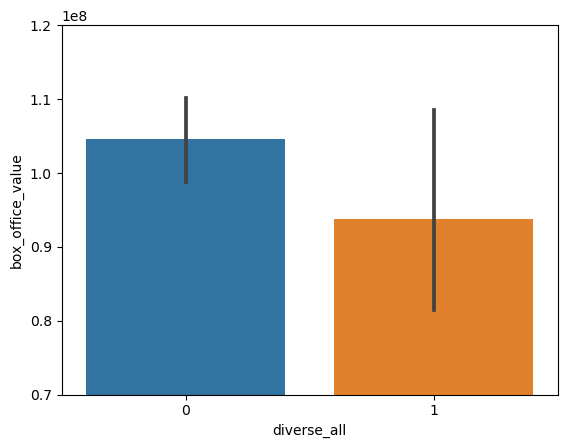

In [87]:
import seaborn as sns

ax = sns.barplot(x="diverse_all", y="box_office_value", data=df_diversity[['box_office_value','diverse_all']])
plt.ylim([7e7,12e7]);

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///home/mg/ADA/ada-2022-project-imdbmi/plots/gender_ratio ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


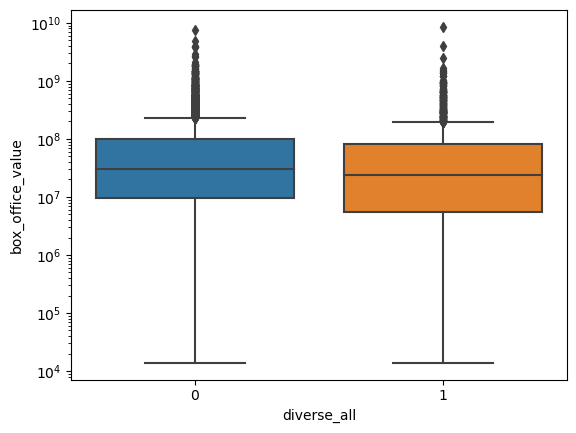

In [88]:
ax = sns.boxplot(x="diverse_all", y="box_office_value", data=df_diversity[['box_office_value','diverse_all']])
ax.set_yscale('log')